In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from mpl_toolkits.mplot3d import Axes3D
import astropy.coordinates as coord
import astropy.units as u

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
with open('specphoto.pickle', 'rb') as f:
    sp = pickle.load(f)
    f.close()
print(sp.shape)  # 3.2 million observations
sp.head()

(3229302, 16)


,objid,specobjid,class,ra,dec,redshift,u,g,r,i,z,spectroflux_u,spectroflux_g,spectroflux_r,spectroflux_i,spectroflux_z
0,1237648704604471436,409948271046322176,STAR,245.921,0.157224,-0.000784,19.2158,17.8629,17.9782,18.0781,18.1470,61.11510,70.77350,62.1033,55.9497,48.8436
1,1237648703520309420,346818705755236352,GALAXY,222.089,-0.807538,0.056228,17.6402,16.2368,15.5232,15.1244,14.8350,12.10380,34.62440,80.1417,123.5950,160.4250
2,1237651752387412385,304085365851973632,GALAXY,151.934,1.038220,0.182405,19.8285,18.3418,17.3290,16.8407,16.5182,3.54406,7.32001,19.6642,31.2168,42.9237
3,1237648722316951761,338988538395650048,GALAXY,208.536,0.769607,0.102895,20.3301,18.4431,17.5159,17.0874,16.7807,5.85816,18.77310,49.0932,72.4772,96.5138
4,1237668567710564584,387390135584450560,GALAXY,240.171,-0.962358,0.156958,21.3720,19.0130,17.6304,17.0631,16.6155,4.98017,13.06420,42.0981,69.3377,99.1633


In [4]:
with open('zoospecphoto.pickle', 'rb') as f:
    zsp = pickle.load(f)
    f.close()
print(zsp.shape)  # ~200,000 observations
zsp.head()

(197937, 17)


,objid,specobjid,spiral,elliptical,ra,dec,redshift,u,g,r,i,z,spectroflux_u,spectroflux_g,spectroflux_r,spectroflux_i,spectroflux_z
0,1237666407365738659,432400020604479488,0,1,353.328,-0.450154,0.058485,16.9770,15.0677,14.1465,13.6946,13.3555,34.10310,116.8900,291.0530,438.6530,588.1610
1,1237671266033992047,327804855638845440,1,0,191.461,1.021810,0.084116,19.1915,17.5387,16.7668,16.3710,16.0834,14.67950,34.7216,74.7768,111.4800,142.5410
2,1237671266033926439,327806779784194048,1,0,191.382,0.901669,0.089536,19.6597,18.0336,17.1419,16.6609,16.2882,7.39504,20.2385,48.7808,79.2346,108.3190
3,1237674602679501105,340026473110857728,1,0,212.940,-0.904272,0.054444,19.3794,17.5733,16.5850,16.0725,15.5990,7.77995,24.7948,65.6886,112.5340,161.2260
4,1237648703516115180,340036093837600768,1,0,212.542,-0.751769,0.107122,18.4530,17.1161,16.5073,16.1414,15.8843,7.55275,17.4532,35.0269,52.0750,65.6971


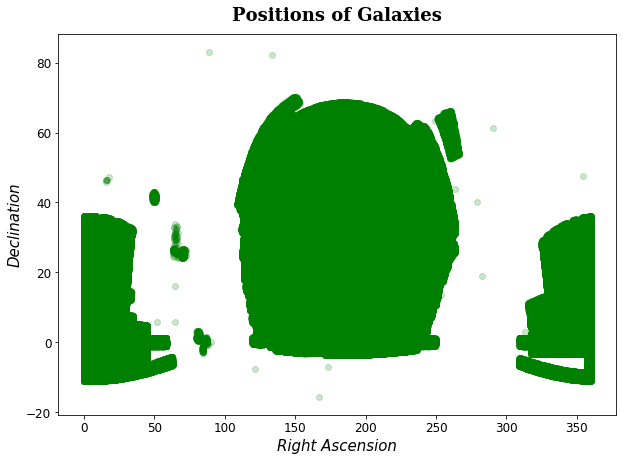

In [28]:
# plot declination vs. right ascension (both in degrees, like lat/long) for specphoto galaxies
plt.figure(figsize = (10, 7))
plt.scatter(sp.loc[sp['class'] == 'GALAXY', 'ra'], sp.loc[sp['class'] == 'GALAXY', 'dec'], 
            color = 'green', alpha = 0.2)
plt.title("Positions of Galaxies", fontsize = 18, fontweight = 'bold', family = 'serif', y = 1.02)
plt.xlabel('Right Ascension', style = 'italic', fontsize = 15)
plt.ylabel('Declination', style = 'italic', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12)

plt.show()
plt.close()

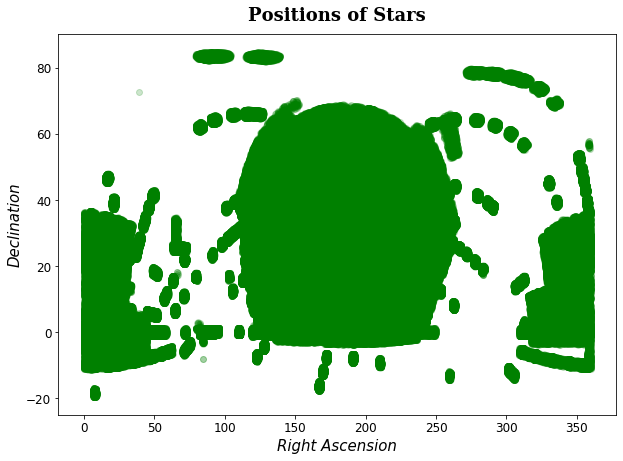

In [29]:
# plot declination vs. right ascension for specphoto stars
plt.figure(figsize = (10, 7))
plt.scatter(sp.loc[sp['class'] == 'STAR', 'ra'], sp.loc[sp['class'] == 'STAR', 'dec'], 
           color = 'green', alpha = 0.2)
plt.title("Positions of Stars", fontsize = 18, fontweight = 'bold', family = 'serif', y = 1.02)
plt.xlabel('Right Ascension', style = 'italic', fontsize = 15)
plt.ylabel('Declination', style = 'italic', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12)

plt.show()
plt.close()

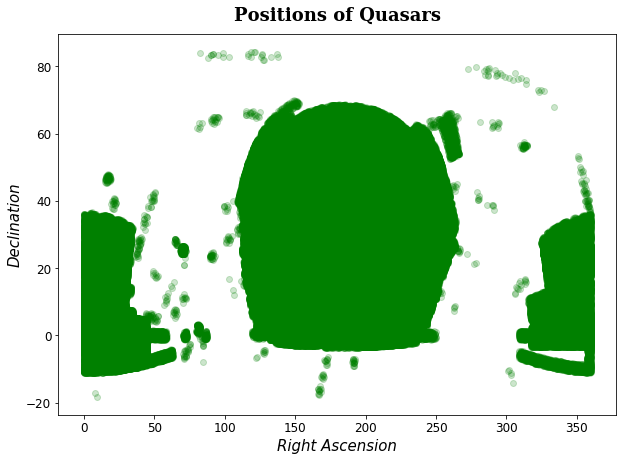

In [30]:
# plot declination vs. right ascension for specphoto quasars
plt.figure(figsize = (10, 7))
plt.scatter(sp.loc[sp['class'] == 'QSO', 'ra'], sp.loc[sp['class'] == 'QSO', 'dec'], 
           color = 'green', alpha = 0.2)
plt.title("Positions of Quasars", fontsize = 18, fontweight = 'bold', family = 'serif', y = 1.02)
plt.xlabel('Right Ascension', style = 'italic', fontsize = 15)
plt.ylabel('Declination', style = 'italic', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12)

plt.show()
plt.close()

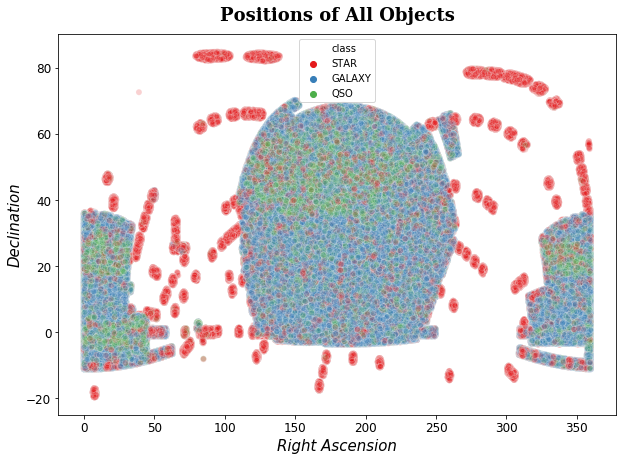

In [69]:
# plot declination vs. right ascension for all specphoto objects, colored by object type
plt.figure(figsize = (10, 7))
sns.scatterplot(x = 'ra', y = 'dec', hue = 'class', data = sp, alpha = 0.2, palette = 'Set1')
plt.title("Positions of All Objects", fontsize = 18, fontweight = 'bold', family = 'serif', y = 1.02)
plt.xlabel('Right Ascension', style = 'italic', fontsize = 15)
plt.ylabel('Declination', style = 'italic', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12)

plt.savefig('objects_type_map.png', dpi = 200, bbox_inches = 'tight')
plt.show()
plt.close()

In [56]:
# make zoospecphoto column with galaxy class labels (as opposed to original indicator variables)
zsp['type'] = ['Spiral' if i == 1 else 'Elliptical' for i in zsp['spiral']]

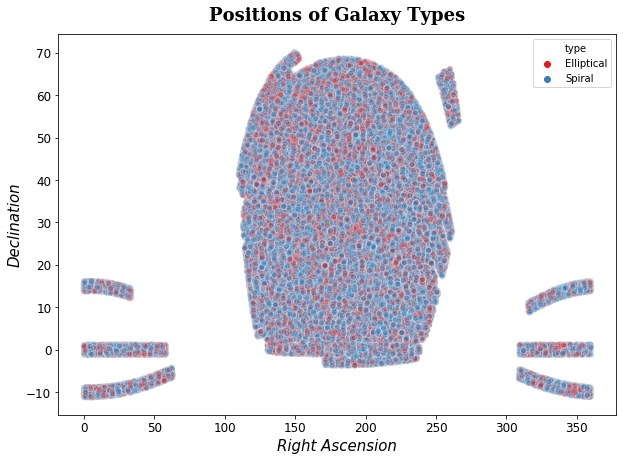

In [68]:
# plot declination vs. right ascension for zoospecphoto objects (galaxies) colored by galaxy type
plt.figure(figsize = (10, 7))
sns.scatterplot(x = 'ra', y = 'dec', hue = 'type', data = zsp, alpha = 0.2, palette = 'Set1')
plt.title("Positions of Galaxy Types", fontsize = 18, fontweight = 'bold', family = 'serif', y = 1.02)
plt.xlabel('Right Ascension', style = 'italic', fontsize = 15)
plt.ylabel('Declination', style = 'italic', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12)

plt.savefig('galaxy_types_map.png', dpi = 200, bbox_inches = 'tight')
plt.show()
plt.close()

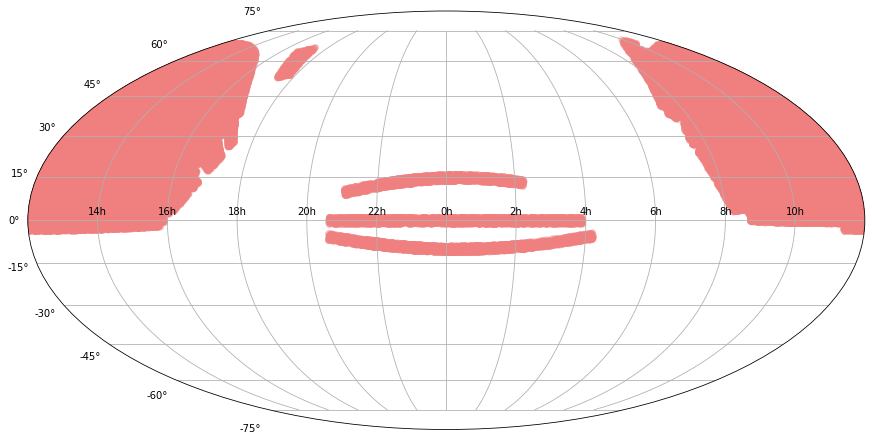

In [67]:
# plot declination vs. right ascension in equatorial coordinates (more accurate spatial representation)
ra = coord.Angle(zsp['ra'] * u.degree)  # extract ra in degrees
ra = ra.wrap_at(180 * u.degree)  # transform to [-180, 180] from [0, 360]
dec = coord.Angle(zsp['dec'] * u.degree)  # extract dec in degrees

fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(111, projection = "mollweide")  # mollweide projection of equatorial system
ax.scatter(ra.radian, dec.radian, color = 'lightcoral', alpha = 0.2)  # needs positions in radians
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])  # change X labels to radians
ax.grid(True)

plt.savefig('equatorial_map_galaxy.png', dpi = 200, bbox_inches = 'tight')
plt.show()
plt.close()

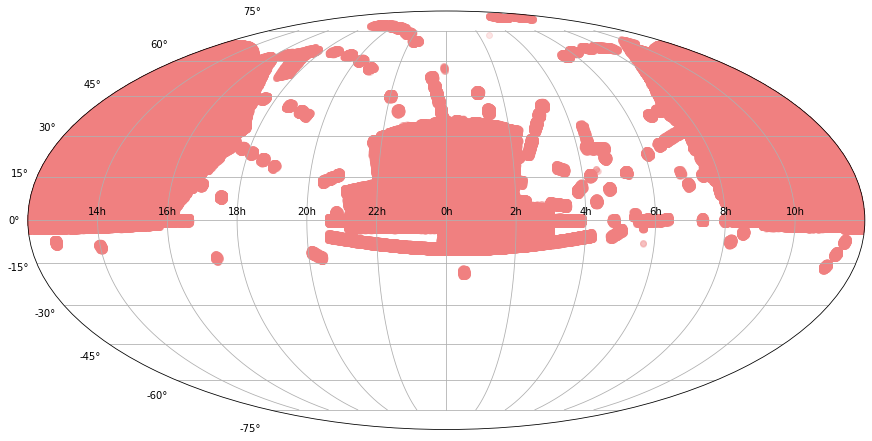

In [66]:
# repeat for specphoto objects
ra = coord.Angle(sp['ra'] * u.degree)
ra = ra.wrap_at(180 * u.degree)
dec = coord.Angle(sp['dec'] * u.degree)

fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(111, projection = "mollweide")
ax.scatter(ra.radian, dec.radian, color = 'lightcoral', alpha = 0.2)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)

plt.savefig('equatorial_map_objects.png', dpi = 200, bbox_inches = 'tight')
plt.show()
plt.close()

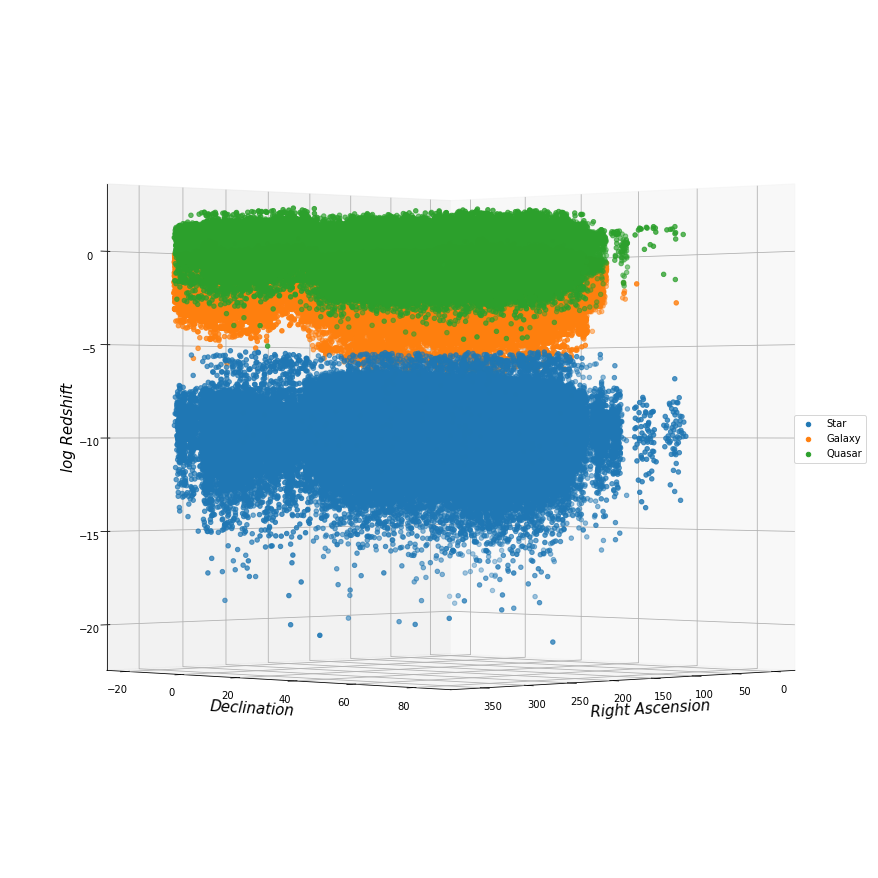

In [54]:
# 3D scatterplot of ra vs. dec vs. redshift (z-axis) for specphoto objects, colored by object type
# redshift is linearly related to distance from Earth and is often used as distance measure

fig = plt.figure(figsize = (12, 12))
ax = Axes3D(fig)
for obj in sp['class'].unique():
    ax.scatter(sp[sp['class'] == obj]['ra'], 
               sp[sp['class'] == obj]['dec'], 
               np.log(sp[sp['class'] == obj]['redshift']),   # using log of redshift for scale
               label = obj)
ax.set_xlabel('Right Ascension', style = 'italic', fontsize = 15)
ax.set_ylabel('Declination', style = 'italic', fontsize = 15)
ax.set_zlabel('log Redshift', style = 'italic', fontsize = 15)
ax.view_init(elev = 0, azim = 45)  # rotation of plot for viewing purposes
ax.legend(['Star', 'Galaxy', 'Quasar'], loc = 'center right')

plt.savefig('3D_plot_objects_all.png', dpi = 200, bbox_inches = 'tight')
plt.show()
plt.close()

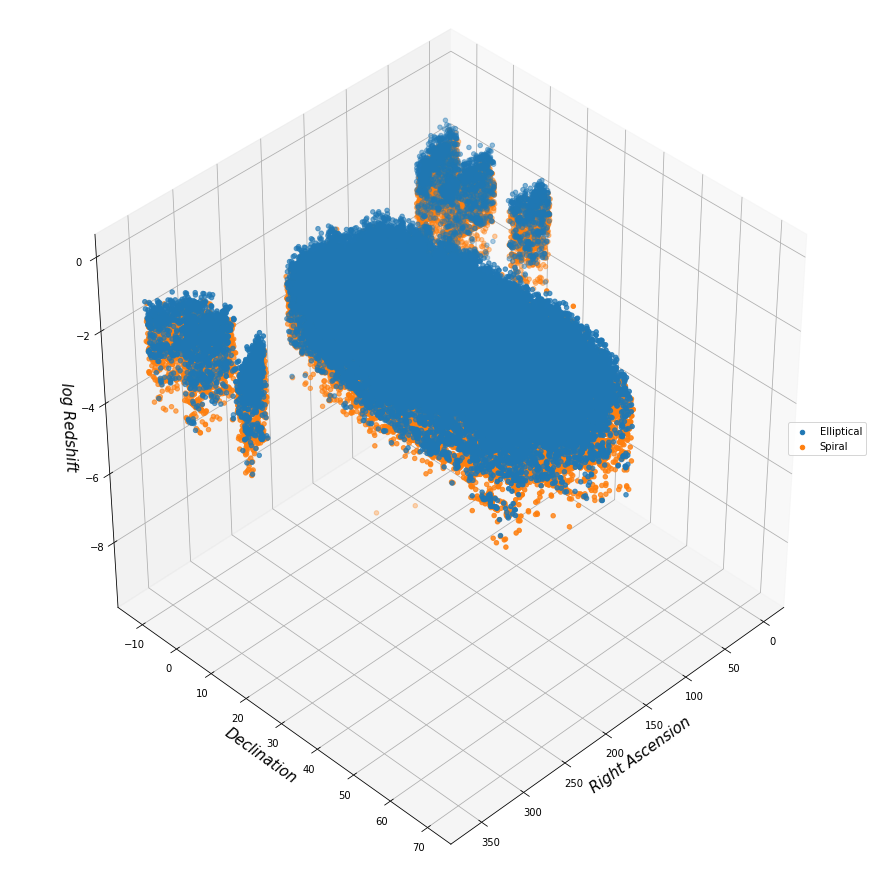

In [57]:
# 3D ra-dec-redshift plot for zoospecphoto galaxies, colored by galaxy type
fig = plt.figure(figsize = (12, 12))
ax = Axes3D(fig)

for obj in zsp['type'].unique():
    ax.scatter(zsp[zsp['type'] == obj]['ra'], 
               zsp[zsp['type'] == obj]['dec'], 
               np.log(zsp[zsp['type'] == obj]['redshift']), 
               label = obj)

ax.set_xlabel('Right Ascension', style = 'italic', fontsize = 15)
ax.set_ylabel('Declination', style = 'italic', fontsize = 15)
ax.set_zlabel('log Redshift', style = 'italic', fontsize = 15)
ax.view_init(elev = 40, azim = 45)
ax.legend(loc = 'center right')

plt.savefig('3D_plot_galaxies.png', dpi = 200, bbox_inches = 'tight')
plt.show()
plt.close()

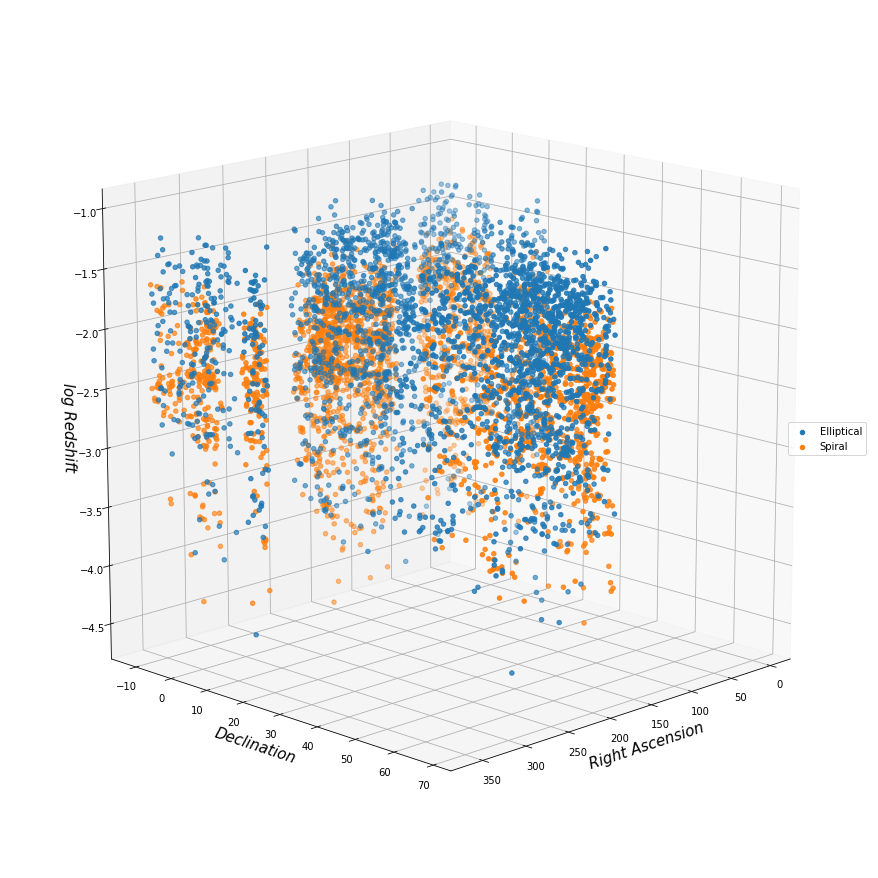

In [76]:
# same as above but only using 6,000 galaxies for visualization
fig = plt.figure(figsize = (12, 12))
ax = Axes3D(fig)

for obj in zsp['type'].unique():
    ax.scatter(zsp[zsp['type'] == obj]['ra'][0:3000], 
               zsp[zsp['type'] == obj]['dec'][0:3000], 
               np.log(zsp[zsp['type'] == obj]['redshift'][0:3000]), 
               label = obj)

ax.set_xlabel('Right Ascension', style = 'italic', fontsize = 15)
ax.set_ylabel('Declination', style = 'italic', fontsize = 15)
ax.set_zlabel('log Redshift', style = 'italic', fontsize = 15)
ax.view_init(elev = 15, azim = 45)
ax.legend(loc = 'center right')

plt.savefig('3D_plot_galaxies_small.png', dpi = 200, bbox_inches = 'tight')
plt.show()
plt.close()

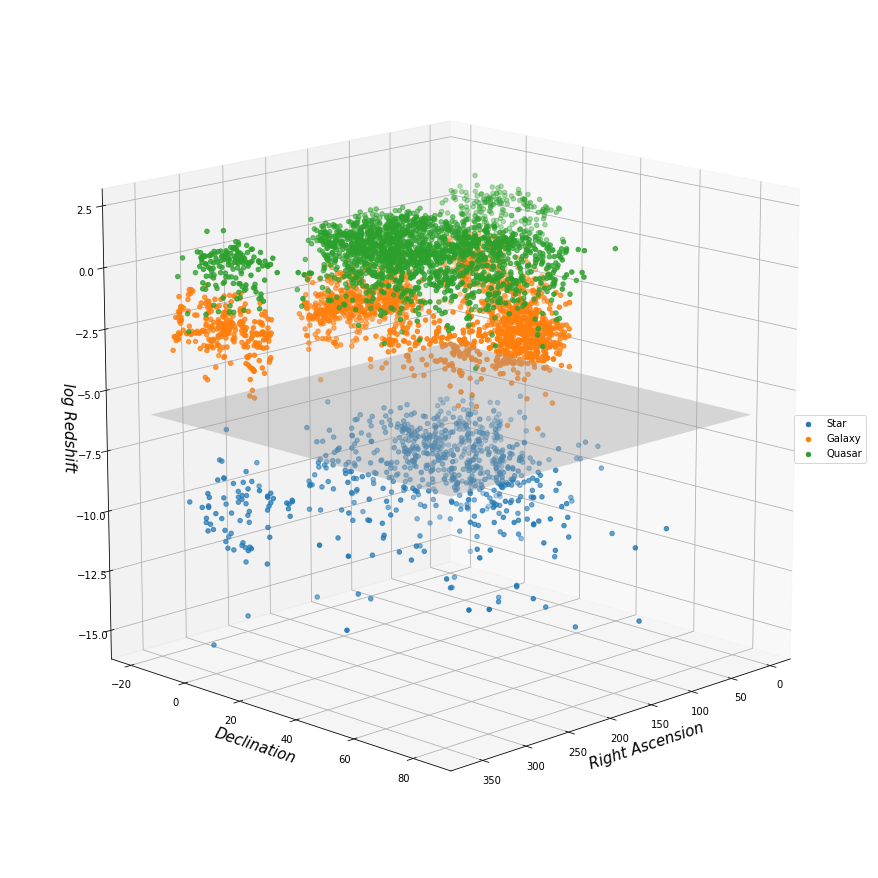

In [59]:
# same as specphoto 3D plot above but only using 6,000 objects and including separating plane
fig = plt.figure(figsize = (12, 12))
ax = Axes3D(fig)
for obj in sp['class'].unique():
    ax.scatter(sp[sp['class'] == obj]['ra'][0:2000], 
               sp[sp['class'] == obj]['dec'][0:2000], 
               np.log(sp[sp['class'] == obj]['redshift'][0:2000]), 
               label = obj)
    
xx, yy = np.meshgrid([min(sp.ra), max(sp.ra)], [min(sp.dec), max(sp.dec)])
zz = (0 * xx) + (0 * yy) + (-6)

ax.plot_surface(xx, yy, zz, color = 'lightgrey', alpha = 0.4)
ax.set_xlabel('Right Ascension', style = 'italic', fontsize = 15)
ax.set_ylabel('Declination', style = 'italic', fontsize = 15)
ax.set_zlabel('log Redshift', style = 'italic', fontsize = 15)
ax.view_init(elev = 15, azim = 45)
ax.legend(['Star', 'Galaxy', 'Quasar'], loc = 'center right')
plt.savefig('object_position_w_plane.png', bbox_inches = 'tight')

plt.savefig('3D_plot_objects_small.png', dpi = 200, bbox_inches = 'tight')
plt.show()
plt.close()

In [5]:
# generate features to represent object colors; astronomers often define color with difference
# between spectral filter magnitudes (e.g. 'u-g color') and plot them using color-color diagrams

sp['u-g'] = sp['u'] - sp['g']
sp['g-r'] = sp['g'] - sp['r']

zsp['u-g'] = zsp['u'] - zsp['g']
zsp['g-r'] = zsp['g'] - zsp['r']

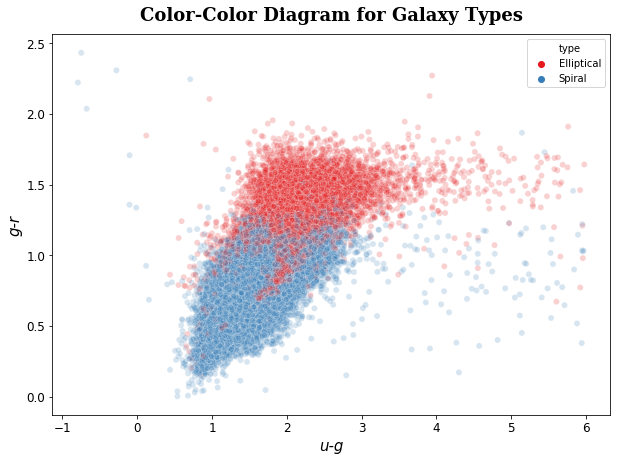

In [84]:
# color-color diagrams often reveal differences between astronomical object types
plt.figure(figsize = (10, 7))
sns.scatterplot(x = 'u-g', y = 'g-r', hue = 'type', 
                data = zsp[(zsp['g-r'] > 0) & (zsp['g-r'] < 3) & (zsp['u-g'] < 6)],  # removed extremes for viz
                alpha = 0.2, palette = 'Set1')
plt.title("Color-Color Diagram for Galaxy Types", fontsize = 18, fontweight = 'bold', 
          family = 'serif', y = 1.02)
plt.xlabel('u-g', style = 'italic', fontsize = 15)
plt.ylabel('g-r', style = 'italic', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12)

plt.savefig('color_color_diagram_galaxies.png', dpi = 200, bbox_inches = 'tight')
plt.show()
plt.close()